In [1]:
import openai
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from openai import OpenAI

In [2]:
load_dotenv()  # Reads from .env file

True

In [24]:
# Initialize OpenAI client
client = openai.OpenAI()

# The incomplete sentence
sentence = "Tell me a fun fact:"

# Get completion with logprobs
response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=sentence,
    max_tokens=16,
    logprobs=50,  # Request top 50 logprobs
    temperature=0
)

In [25]:
print(response.choices[0].text)



The world's oldest piece of chewing gum is over 9,000 years


In [26]:
response.choices[0].logprobs.top_logprobs

[{'\n\n': -0.044654932,
  '\n': -3.4255753,
  ' The': -6.191759,
  ' \n\n': -6.643919,
  ' There': -7.2900276,
  ' A': -7.3246536,
  'There': -7.353012,
  ' In': -7.4684963,
  '\n\n\n': -7.9769154,
  ' One': -8.012354,
  ' "': -8.175491,
  'In': -8.290377,
  'One': -8.3162365,
  ' Some': -8.493689,
  '\n\n\n\n': -8.55649,
  ' \n': -8.91041,
  ' Did': -8.9644,
  'The': -9.058235,
  'Some': -9.243857,
  '"': -9.382361},
 {'The': -0.59203136,
  'A': -1.9209193,
  'P': -3.0030785,
  'There': -3.0853481,
  'In': -3.195568,
  'Did': -3.48744,
  'C': -4.2325687,
  'Some': -4.410309,
  'H': -4.6472893,
  'One': -4.759573,
  'K': -4.934761,
  'Ban': -5.1399,
  'Ele': -5.2749977,
  'Despite': -5.4683647,
  'G': -5.5320377,
  'B': -5.7457047,
  'D': -5.835949,
  'Humans': -5.8915443,
  'O': -5.9790154,
  'An': -6.0710163},
 {' world': -0.99150103,
  ' shortest': -1.5474684,
  ' average': -1.8302691,
  ' longest': -2.4751513,
  ' first': -4.3333263,
  ' word': -4.3972664,
  ' inventor': -4.7024555

In [31]:
response.choices[0].logprobs.top_logprobs[0]

{'\n\n': -0.044654932,
 '\n': -3.4255753,
 ' The': -6.191759,
 ' \n\n': -6.643919,
 ' There': -7.2900276,
 ' A': -7.3246536,
 'There': -7.353012,
 ' In': -7.4684963,
 '\n\n\n': -7.9769154,
 ' One': -8.012354,
 ' "': -8.175491,
 'In': -8.290377,
 'One': -8.3162365,
 ' Some': -8.493689,
 '\n\n\n\n': -8.55649,
 ' \n': -8.91041,
 ' Did': -8.9644,
 'The': -9.058235,
 'Some': -9.243857,
 '"': -9.382361}

In [32]:
response.choices[0].logprobs.top_logprobs[1]

{'The': -0.59203136,
 'A': -1.9209193,
 'P': -3.0030785,
 'There': -3.0853481,
 'In': -3.195568,
 'Did': -3.48744,
 'C': -4.2325687,
 'Some': -4.410309,
 'H': -4.6472893,
 'One': -4.759573,
 'K': -4.934761,
 'Ban': -5.1399,
 'Ele': -5.2749977,
 'Despite': -5.4683647,
 'G': -5.5320377,
 'B': -5.7457047,
 'D': -5.835949,
 'Humans': -5.8915443,
 'O': -5.9790154,
 'An': -6.0710163}

In [33]:
response.choices[0].logprobs.top_logprobs[2]

{' world': -0.99150103,
 ' shortest': -1.5474684,
 ' average': -1.8302691,
 ' longest': -2.4751513,
 ' first': -4.3333263,
 ' word': -4.3972664,
 ' inventor': -4.7024555,
 ' smallest': -4.950321,
 ' national': -5.035757,
 ' tongue': -5.0927258,
 ' Great': -5.100168,
 ' dot': -5.1042213,
 ' fingerprints': -5.154007,
 ' E': -5.1626034,
 ' largest': -5.2673626,
 ' "': -5.4105988,
 ' human': -5.535059,
 ' original': -5.6083336,
 ' oldest': -5.7235756,
 ' tallest': -5.753811}

In [4]:
# Extract and convert logprobs to probabilities
logprobs = response.choices[0].logprobs.top_logprobs[0]
print(f"Number of tokens received: {len(logprobs)}")

Number of tokens received: 20


In [7]:
probs = {token: np.exp(logprob) for token, logprob in logprobs.items()}
print(probs)

{'\n\n': np.float64(0.9563274228949383), '\n': np.float64(0.03253056077313683), ' The': np.float64(0.0020462242773236854), ' \n\n': np.float64(0.0013019150279977491), ' There': np.float64(0.0006823092207620032), ' A': np.float64(0.0006590879319272647), 'There': np.float64(0.000640659784087078), ' In': np.float64(0.0005707859427170967), '\n\n\n': np.float64(0.0003432967240755957), ' One': np.float64(0.00033134381687783355), ' "': np.float64(0.00028146822336690483), 'In': np.float64(0.00025091984812713585), 'One': np.float64(0.00024451436456451344), ' Some': np.float64(0.0002047565183673231), '\n\n\n\n': np.float64(0.00019229305912782737), ' \n': np.float64(0.0001349764822846822), ' Did': np.float64(0.0001278823317561027), 'The': np.float64(0.00011642829127600289), 'Some': np.float64(9.670388311529965e-05), '"': np.float64(8.419618049811989e-05)}


In [8]:
# Normalize probabilities
total = sum(probs.values())
probs = {token: prob/total for token, prob in probs.items()}

# Sort probabilities
sorted_items = sorted(probs.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 tokens with their probabilities:")
for token, prob in sorted_items[:10]:
    print(f"'{token}': {prob:.3%}")


Top 10 tokens with their probabilities:
'

': 95.904%
'
': 3.262%
' The': 0.205%
' 

': 0.131%
' There': 0.068%
' A': 0.066%
'There': 0.064%
' In': 0.057%
'


': 0.034%
' One': 0.033%


In [9]:
sorted_items

[('\n\n', np.float64(0.9590436785961374)),
 ('\n', np.float64(0.0326229572882297)),
 (' The', np.float64(0.0020520361658318987)),
 (' \n\n', np.float64(0.0013056128557841476)),
 (' There', np.float64(0.0006842471828725795)),
 (' A', np.float64(0.0006609599386373406)),
 ('There', np.float64(0.000642479449349617)),
 (' In', np.float64(0.0005724071453867602)),
 ('\n\n\n', np.float64(0.00034427178937399585)),
 (' One', np.float64(0.0003322849323473942)),
 (' "', np.float64(0.00028226767724444016)),
 ('In', np.float64(0.0002516325354889143)),
 ('One', np.float64(0.0002452088584385497)),
 (' Some', np.float64(0.00020533808807562376)),
 ('\n\n\n\n', np.float64(0.0001928392288868999)),
 (' \n', np.float64(0.000135359855835159)),
 (' Did', np.float64(0.0001282455557988303)),
 ('The', np.float64(0.00011675898242046675)),
 ('Some', np.float64(9.697855104549961e-05)),
 ('"', np.float64(8.443532281467596e-05))]

In [12]:
tokens, probabilities = zip(*sorted_items)
print(tokens)
print(probabilities)

('\n\n', '\n', ' The', ' \n\n', ' There', ' A', 'There', ' In', '\n\n\n', ' One', ' "', 'In', 'One', ' Some', '\n\n\n\n', ' \n', ' Did', 'The', 'Some', '"')
(np.float64(0.9590436785961374), np.float64(0.0326229572882297), np.float64(0.0020520361658318987), np.float64(0.0013056128557841476), np.float64(0.0006842471828725795), np.float64(0.0006609599386373406), np.float64(0.000642479449349617), np.float64(0.0005724071453867602), np.float64(0.00034427178937399585), np.float64(0.0003322849323473942), np.float64(0.00028226767724444016), np.float64(0.0002516325354889143), np.float64(0.0002452088584385497), np.float64(0.00020533808807562376), np.float64(0.0001928392288868999), np.float64(0.000135359855835159), np.float64(0.0001282455557988303), np.float64(0.00011675898242046675), np.float64(9.697855104549961e-05), np.float64(8.443532281467596e-05))


In [17]:
def func(*args):
    print(args)  # args is a tuple of all arguments

x = [1,2,3]
func(*x)  # args = (1, 2, 3)

(1, 2, 3)


Text(0, 0.5, 'Token')

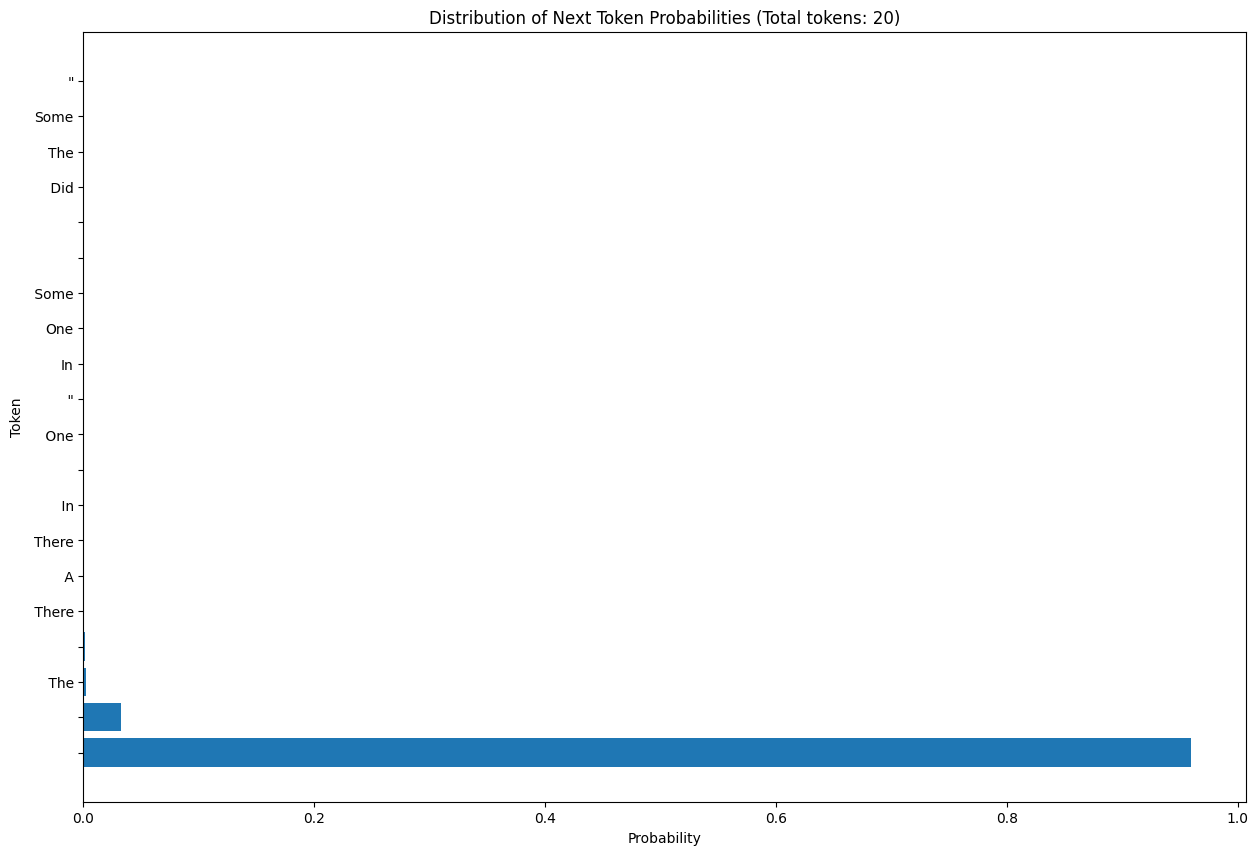

In [18]:
# Create visualization showing all available tokens
plt.figure(figsize=(15, 10))  # Made figure larger to accommodate more tokens
plt.barh(range(len(tokens)), probabilities)
plt.yticks(range(len(tokens)), tokens)
plt.title(f'Distribution of Next Token Probabilities (Total tokens: {len(tokens)})')
plt.xlabel('Probability')
plt.ylabel('Token')